In [64]:
#import dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
books = pd.read_csv('BX-Books.csv',sep=';',error_bad_lines=False,encoding="latin-1")
books=books.drop(['Year-Of-Publication','Publisher','Image-URL-S','Image-URL-M','Image-URL-L','Book-Author'],axis=1)
books.head()

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


,ISBN,Book-Title
0,0195153448,Classical Mythology
1,0002005018,Clara Callan
2,0060973129,Decision in Normandy
3,0374157065,Flu: The Story of the Great Influenza Pandemic...
4,0393045218,The Mummies of Urumchi


In [65]:
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users=users.drop(['Location','Age'],axis=1)
users.head()

,User-ID
0,1
1,2
2,3
3,4
4,5


In [66]:
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [67]:
users_ratings_merge=pd.merge(users,ratings,on='User-ID')
final_merge=pd.merge(users_ratings_merge,books,on='ISBN')
final_merge.head()

,User-ID,ISBN,Book-Rating,Book-Title
0,2,0195153448,0,Classical Mythology
1,8,0002005018,5,Clara Callan
2,11400,0002005018,0,Clara Callan
3,11676,0002005018,8,Clara Callan
4,41385,0002005018,0,Clara Callan


In [68]:
final_merge=final_merge.drop(['ISBN'],axis=1)
final_merge.head()

,User-ID,Book-Rating,Book-Title
0,2,0,Classical Mythology
1,8,5,Clara Callan
2,11400,0,Clara Callan
3,11676,8,Clara Callan
4,41385,0,Clara Callan


In [69]:
#describe Book-rating to see the dispersion
final_merge['Book-Rating'].describe()

count    1.031136e+06
mean     2.839051e+00
std      3.854157e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: Book-Rating, dtype: float64

In [70]:
#as per the above description,mean=2.8 and hence will select only those books which are having rating more than the mean
final_merge=final_merge[final_merge['Book-Rating'] > 2.8]
final_merge['Book-Rating'].describe()

count    379986.000000
mean          7.687696
std           1.747050
min           3.000000
25%           7.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: Book-Rating, dtype: float64

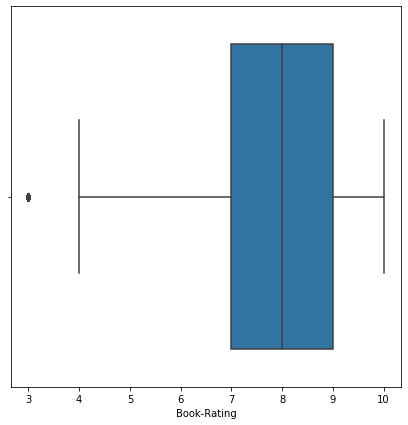

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,7))
sns.boxplot(final_merge['Book-Rating'])
plt.show()

In [72]:
#merge rating_count and final_dataset
final_merge_rating_cnt=pd.DataFrame(final_merge.groupby('Book-Title')['Book-Rating'].count()).rename(columns={'Book-Rating':'rating_count'})
final_merge_rating_cnt.head()

,rating_count
Book-Title,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1
Dark Justice,1
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",6
Final Fantasy Anthology: Official Strategy Guide (Brady Games),2


In [73]:
final_merge_rating_cnt['rating_count'].describe()

count    134560.000000
mean          2.823915
std           9.035724
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         703.000000
Name: rating_count, dtype: float64

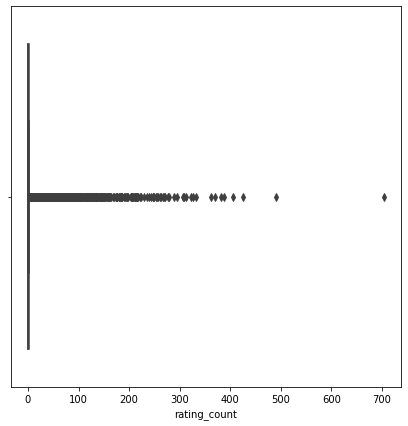

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,7))
sns.boxplot(final_merge_rating_cnt['rating_count'])
plt.show()

In [75]:
final_merge=pd.merge(final_merge,final_merge_rating_cnt,on='Book-Title')
final_merge.head()

,User-ID,Book-Rating,Book-Title,rating_count
0,8,5,Clara Callan,9
1,11676,8,Clara Callan,9
2,67544,8,Clara Callan,9
3,116866,9,Clara Callan,9
4,123629,9,Clara Callan,9


In [76]:
#select only those books which are having count of rating more than 150 as evident from boxplot
final_merge=final_merge[final_merge['rating_count'] > 150]
final_merge.head()

,User-ID,Book-Rating,Book-Title,rating_count
173,3329,8,The Testament,261
174,7346,9,The Testament,261
175,7352,8,The Testament,261
176,9419,5,The Testament,261
177,11224,6,The Testament,261


In [77]:
#creating pivot table
books_pivot_table=final_merge.pivot_table(index='User-ID',columns='Book-Title',values='Book-Rating')
books_pivot_table.head()

Book-Title,1st to Die: A Novel,A Bend in the Road,A Painted House,A Prayer for Owen Meany,A Time to Kill,A Walk to Remember,Angels &amp; Demons,Bel Canto: A Novel,Bridget Jones's Diary,Confessions of a Shopaholic (Summer Display Opportunity),...,The Testament,Timeline,To Kill a Mockingbird,"Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",Where the Heart Is (Oprah's Book Club (Paperback)),While I Was Gone,White Oleander : A Novel,White Oleander : A Novel (Oprah's Book Club),Wicked: The Life and Times of the Wicked Witch of the West,Wild Animus
User-ID,,,,,,,,,,,,,,,,,,,,,
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
#recommandation for A Bend in the Road
A_Bend_in_the_Road_rec=books_pivot_table['A Bend in the Road']
similar_to_bend=pd.DataFrame(books_pivot_table.corrwith(A_Bend_in_the_Road_rec),columns=['correlation']).sort_values(by='correlation',ascending=False)
similar_to_bend.head()

C:\Users\kapasiya\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\kapasiya\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation
Book-Title,
The Bridges of Madison County,1.0
Interview with the Vampire,1.0
Red Dragon,1.0
She's Come Undone (Oprah's Book Club (Paperback)),1.0
The Poisonwood Bible: A Novel,1.0


So these are the books recommended for A Bend in the Road